In [1]:
import numpy as np
import matplotlib.pyplot as plt



plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        # "font.sans-serif": ["Helvetica"]
    }
)



<ipython-input-5-e72ed0131c19>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))


Text(0, 0.5, '$t$')

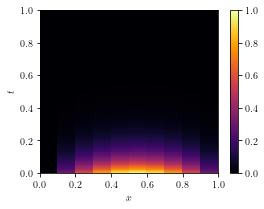

In [5]:
#def explicit_FD_heat_equation(dx,dt,t_final):
tn = 1
dt = 0.005
dx = 0.1
x = np.linspace(0, 1, int(1/dx)+1)
t = np.linspace(0, tn, int(tn/dt)+1)
delta = dt/dx**2

solution = np.zeros((len(t),len(x)))
solution[0,:] = np.sin(np.pi*x)

#setup scheme matrix, should be scipy routines for faster (sparse) handling of this
scheme_matrix = np.zeros((len(x),len(x)))
building_block = np.asarray([delta, 1-2*delta, delta])
for i in range(1,len(x)-1):
    scheme_matrix[i,i-1:i+2] = building_block


for i in range(len(t)-1):
    solution[i+1,:] = scheme_matrix @ solution[i,:]
    

X, T = np.meshgrid(x, t)
Z = solution

fig, ax = plt.subplots(figsize=(4, 3))
cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))
fig.colorbar(cf, ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")